# Number 1 & 2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import sklearn as sk 
from scipy.stats import pearsonr
from sklearn import datasets
iris = pd.read_csv('iris.data.csv')
iris.head()

,Sepal length in cm,Sepal width in cm,Petal length in cm,Petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
iris.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# number 3

In [3]:
cor3 = iris.corr()

<AxesSubplot:>

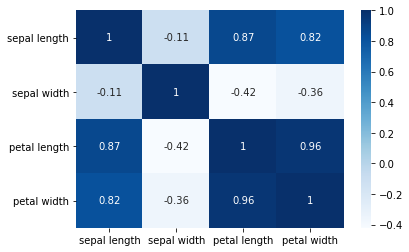

In [4]:
sns.heatmap(cor3, cmap='Blues', annot=True)

#based on the correlation sepal width is has low correlation, so we dicide to remove it,
#we make 2 model, (full model(with everthing) and reduced model(without sepal width))

# number 4

In [5]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()
iris['class'] = le.fit_transform(iris['class'])

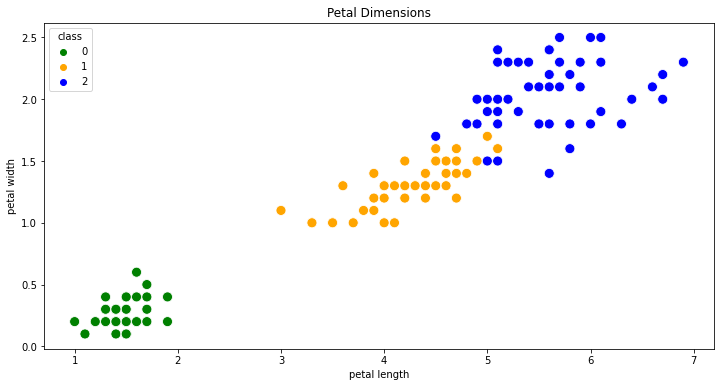

In [6]:
plt.figure(figsize=(12, 6))
plt.title('Petal Dimensions')

sns.scatterplot(x=iris["petal length"], 
                y=iris["petal width"], 
                hue=iris["class"],palette = ["green","orange","blue"],
                s=100);

Text(0.5, 0, 'petal width')

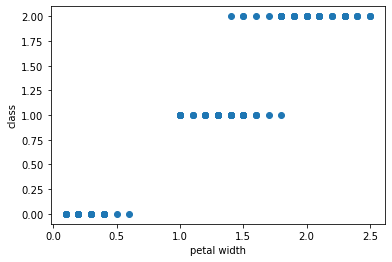

In [7]:
y=iris['class']
x=iris['petal width']
plt.scatter(x, y)
plt.ylabel('class')
plt.xlabel('petal width')

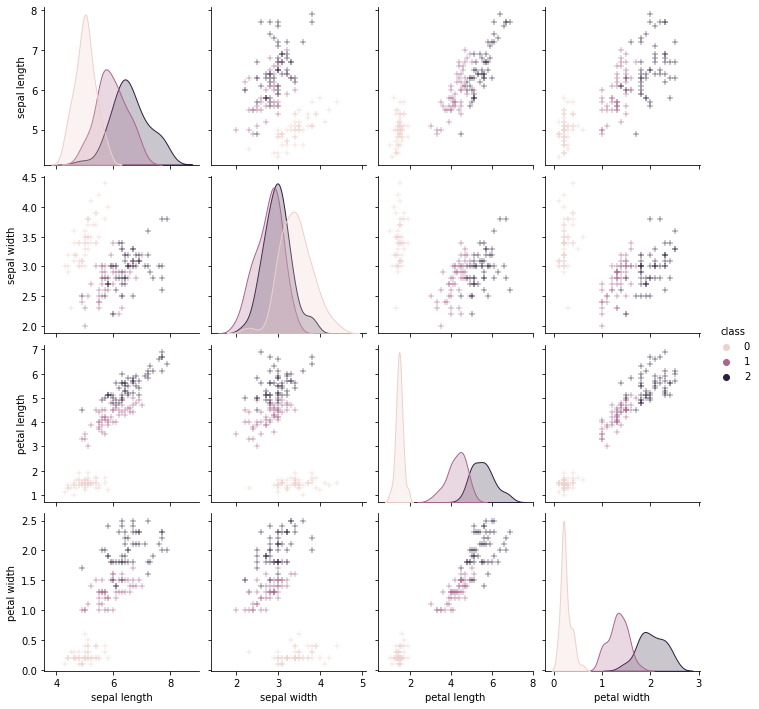

In [8]:
sns.set_palette('husl')
g = sns.pairplot(iris, hue='class', markers='+')
plt.show()

# Number 5

### IRIS full model

In [9]:
# Splitting the dataset into the Training set and Test set
X = iris.iloc[:, [0, 1, 2, 3]].values
y = iris.iloc[:, 4].values

In [10]:
iris

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=10)
classifier.fit(X_train, y_train)

LogisticRegression(C=10)

In [14]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)
### Print results 
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2          | 2          | 0.0        | 0.0           | 1.0       
1          | 1          | 0.0        | 1.0           | 0.0       
0          | 0          | 1.0        | 0.0           | 0.0       
2          | 2          | 0.0        | 0.01          | 0.99      
0          | 0          | 1.0        | 0.0           | 0.0       
2          | 2          | 0.0        | 0.0           | 1.0       
0          | 0          | 1.0        | 0.0           | 0.0       
1          | 1          | 0.0        | 0.94          | 0.05      
1          | 1          | 0.0        | 0.93          | 0.07      
1          | 1          | 0.0        | 0.99          | 0.01      
2          | 2          | 0.0        | 0.14          | 0.86      
1          | 1          | 0.0        | 0.97          | 0.03      
1          | 1          | 0.0        | 0.96          | 0.03      
1       

# nubmer 8

In [15]:
#Accuracy

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


# number 9

In [16]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

Text(33.0, 0.5, 'Truth')

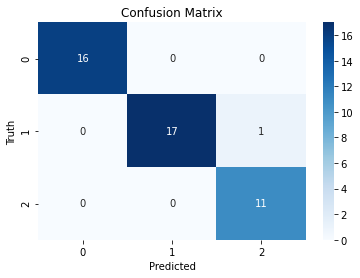

In [17]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, cmap="Blues", ax=ax)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [18]:


from sklearn.ensemble import RandomForestClassifier

clf = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
iris['class'] = le.fit_transform(iris['class'])

from sklearn.preprocessing import label_binarize
Y = label_binarize(y_test, classes=[0, 1, 2])
y = Y.shape[1]
n_classes = Y.shape[1]
model = clf.fit(X_train, y_train)
y_score = model.predict_proba(X_test)

In [19]:
x = iris[['sepal length', 'sepal width', 'petal length', 'petal width']]
y = iris['class']
Y = label_binarize(y, classes=[0, 1, 2])
x_train, x_test, y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=0)

# ROC CLass 2

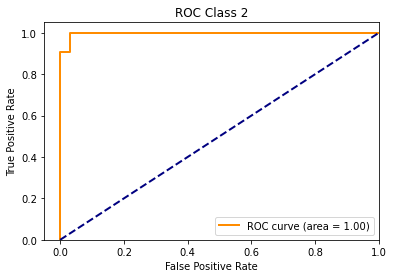

In [20]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  #plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  #print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Class 2")
plt.legend(loc="lower right")
plt.show()

# ROC class 1

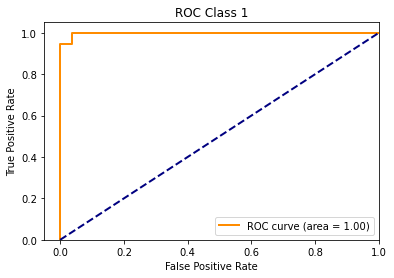

In [21]:
plt.figure()
lw = 2
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Class 1")
plt.legend(loc="lower right")
plt.show()

# ROC class 0

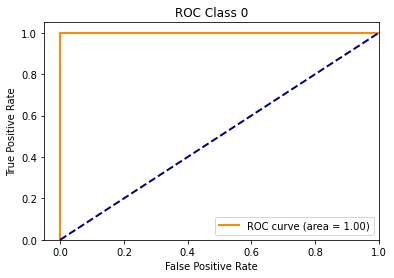

In [22]:
plt.figure()
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Class 0")
plt.legend(loc="lower right")
plt.show()

# reduced model (sepal length, petal length, petal width)

In [23]:
# Splitting the dataset into the Training set and Test set
X = iris.iloc[:, [0, 2, 3]].values
y = iris.iloc[:, 4].values

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [26]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=10)
classifier.fit(X_train, y_train)

LogisticRegression(C=10)

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Predict probabilities
probs_y=classifier.predict_proba(X_test)
### Print results 
probs_y = np.round(probs_y, 2)
res = "{:<10} | {:<10} | {:<10} | {:<13} | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} | {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, y_pred, probs_y[:,0], probs_y[:,1], probs_y[:,2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test     | y_pred     | Setosa(%)  | versicolor(%) | virginica(%)
-----------------------------------------------------------------
2          | 2          | 0.0        | 0.0           | 1.0       
1          | 1          | 0.01       | 0.99          | 0.0       
0          | 0          | 0.99       | 0.01          | 0.0       
2          | 2          | 0.0        | 0.01          | 0.99      
0          | 0          | 0.99       | 0.01          | 0.0       
2          | 2          | 0.0        | 0.0           | 1.0       
0          | 0          | 0.99       | 0.01          | 0.0       
1          | 1          | 0.0        | 0.91          | 0.09      
1          | 1          | 0.0        | 0.93          | 0.07      
1          | 1          | 0.0        | 0.99          | 0.01      
2          | 2          | 0.0        | 0.16          | 0.84      
1          | 1          | 0.0        | 0.92          | 0.08      
1          | 1          | 0.0        | 0.94          | 0.05      
1       

# number 8

In [28]:
#Accuracy

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9777777777777777


# number 9

In [29]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

Text(33.0, 0.5, 'Truth')

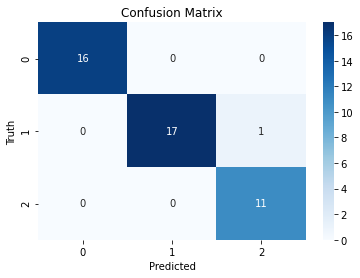

In [30]:
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, cmap="Blues", ax=ax)
ax.set_title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [31]:


from sklearn.ensemble import RandomForestClassifier

clf = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
iris['class'] = le.fit_transform(iris['class'])

from sklearn.preprocessing import label_binarize
Y = label_binarize(y_test, classes=[0, 1, 2])
y = Y.shape[1]
n_classes = Y.shape[1]
model = clf.fit(x_train, y_train)
y_score = model.predict_proba(x_test)

In [32]:
x = iris[['sepal length', 'petal length', 'petal width']]
y = iris['class']
Y = label_binarize(y, classes=[0, 1, 2])
x_train, x_test, y_train, Y_test = train_test_split(x, Y, test_size=0.3, random_state=0)

# REduced model ROC class 2

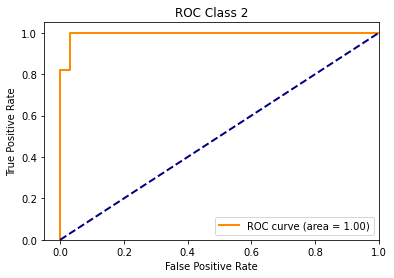

In [33]:
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  #plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  #print('AUC for Class {}: {}'.format(i+1, auc(fpr[i], tpr[i])))
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
plt.figure()
lw = 2
plt.plot(
    fpr[2],
    tpr[2],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Class 2")
plt.legend(loc="lower right")
plt.show()

# REduced model ROC class 1

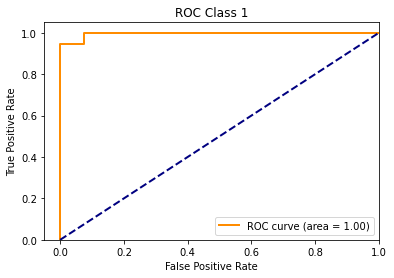

In [34]:
plt.figure()
lw = 2
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Class 1")
plt.legend(loc="lower right")
plt.show()

# REduced model ROC class 0

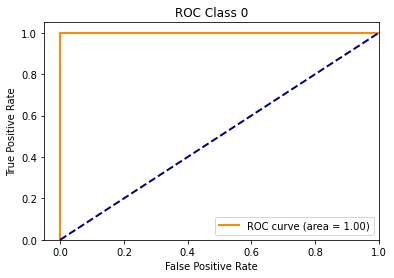

In [35]:
plt.figure()
lw = 2
plt.plot(
    fpr[0],
    tpr[0],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[0],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Class 0")
plt.legend(loc="lower right")
plt.show()

# Number 7

In [36]:
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'random_forest':{
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

scores=[]

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(x,y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
df

,model,best_score,best_params
0,random_forest,0.953333,{'n_estimators': 10}
1,logistic_regression,0.960000,{'C': 5}
